# TABULAR

## library

In [1]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
url = "https://drive.google.com/uc?id=1IRNw_ZH1Qp2vWA3OYSk-SiEXluVB8FPv"
df = pd.read_csv(url)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


## Eksplorasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
df['income_>50K'].value_counts()

,count
income_>50K,
0,33439
1,10518


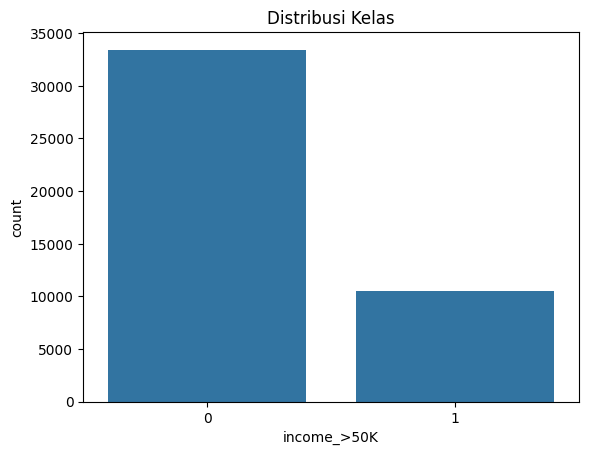

In [6]:
sns.countplot(x='income_>50K', data=df)
plt.title("Distribusi Kelas")
plt.show()

In [7]:
df.isnull().sum()

,0
age,0
workclass,2498
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2506
relationship,0
race,0
gender,0


## Preprocessing

In [8]:
label_encoders = {}
for col in ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Handling missing values
df.fillna(df.median(), inplace=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain',
                    'capital-loss', 'hours-per-week']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [10]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,2.066575,3,1.670303,10,2.301258,0,3,1,4,1,13.064671,-0.218117,1.580004,38,1
1,-1.573960,3,0.519078,2,-0.805463,4,7,3,4,1,-0.144451,-0.218117,-2.048981,38,0
2,-0.554610,3,-0.146210,9,1.136237,2,3,0,4,1,-0.144451,-0.218117,-0.032878,38,1
3,1.411279,6,-0.751028,5,-2.358824,2,13,0,4,1,-0.144451,-0.218117,-0.032878,38,0
4,-0.991474,6,-0.382016,15,-0.028783,4,7,1,2,1,-0.144451,-0.218117,-0.032878,38,0


## Split Data

In [11]:
X = df.drop(columns=['income_>50K'])
y = df['income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model TabNet

In [12]:
# Inisialisasi model TabNet
tabnet = TabNetClassifier()

# Training model TabNet
tabnet.fit(
    X_train.values, y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    eval_name=['valid']
)

epoch 0  | loss: 0.40996 | valid_accuracy: 0.80232 |  0:00:03s
epoch 1  | loss: 0.35057 | valid_accuracy: 0.82689 |  0:00:07s
epoch 2  | loss: 0.34007 | valid_accuracy: 0.83678 |  0:00:12s
epoch 3  | loss: 0.33457 | valid_accuracy: 0.84509 |  0:00:15s
epoch 4  | loss: 0.33064 | valid_accuracy: 0.84486 |  0:00:19s
epoch 5  | loss: 0.32854 | valid_accuracy: 0.84167 |  0:00:23s
epoch 6  | loss: 0.32763 | valid_accuracy: 0.83929 |  0:00:29s
epoch 7  | loss: 0.32664 | valid_accuracy: 0.84145 |  0:00:34s
epoch 8  | loss: 0.3252  | valid_accuracy: 0.83496 |  0:00:41s
epoch 9  | loss: 0.3249  | valid_accuracy: 0.83985 |  0:00:54s
epoch 10 | loss: 0.32321 | valid_accuracy: 0.84418 |  0:00:58s
epoch 11 | loss: 0.32488 | valid_accuracy: 0.84133 |  0:01:02s
epoch 12 | loss: 0.32535 | valid_accuracy: 0.84395 |  0:01:07s
epoch 13 | loss: 0.32496 | valid_accuracy: 0.83803 |  0:01:11s

Early stopping occurred at epoch 13 with best_epoch = 3 and best_valid_accuracy = 0.84509


## Evaluasi Model

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6688
           1       0.72      0.58      0.64      2104

    accuracy                           0.85      8792
   macro avg       0.80      0.75      0.77      8792
weighted avg       0.84      0.85      0.84      8792



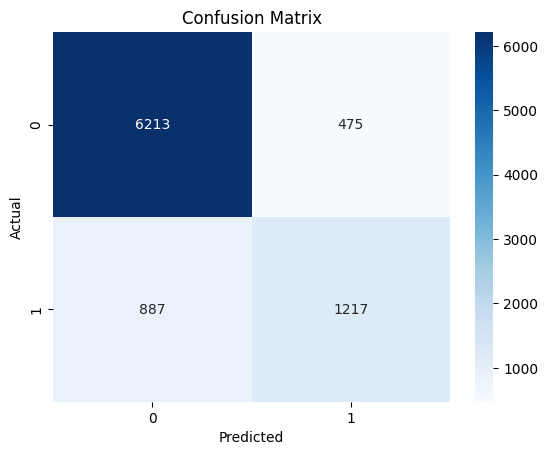

In [13]:
y_pred = tabnet.predict(X_test.values)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

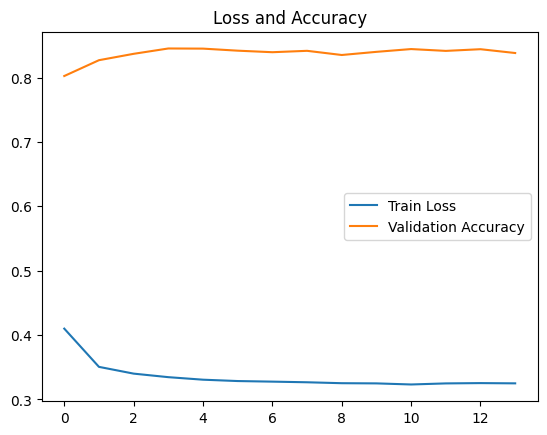

In [15]:
# Plot akurasi dan loss
plt.plot(tabnet.history['loss'], label='Train Loss')
plt.plot(tabnet.history['valid_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Loss and Accuracy")
plt.show()

## Prediksi Data Uji

In [16]:
predictions = tabnet.predict(X_test.values)

## Perbedaan True Label dan Predicted Label

In [17]:
# Membandingkan hasil prediksi
comparison = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predictions
})
print(comparison.head())

       True Label  Predicted Label
23751           1                0
43746           1                1
12885           1                0
5393            0                0
13467           0                0


In [18]:
# Analisis perbedaan
comparison['Correct'] = comparison['True Label'] == comparison['Predicted Label']
print(comparison['Correct'].value_counts())

Correct
True     7430
False    1362
Name: count, dtype: int64


In [19]:
# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Tampilkan metrik lainnya
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6688
           1       0.72      0.58      0.64      2104

    accuracy                           0.85      8792
   macro avg       0.80      0.75      0.77      8792
weighted avg       0.84      0.85      0.84      8792

Accuracy: 0.8450864422202001


## Augmented

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)

X = df.drop(columns=['income_>50K'])
y = df['income_>50K']

X_resampled, y_resampled = smote.fit_resample(X, y)

# Setelah oversampling
print("Distribusi kelas setelah oversampling:", Counter(y_resampled))

# Split data setelah oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

Distribusi kelas setelah oversampling: Counter({1: 33439, 0: 33439})


In [21]:
tabnet = TabNetClassifier()

# Training model TabNet
tabnet.fit(
    X_train.values, y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    eval_name=['valid']
)

epoch 0  | loss: 0.44251 | valid_accuracy: 0.80966 |  0:00:06s
epoch 1  | loss: 0.38924 | valid_accuracy: 0.81721 |  0:00:13s
epoch 2  | loss: 0.3812  | valid_accuracy: 0.82521 |  0:00:19s
epoch 3  | loss: 0.38258 | valid_accuracy: 0.82685 |  0:00:25s
epoch 4  | loss: 0.37904 | valid_accuracy: 0.82102 |  0:00:31s
epoch 5  | loss: 0.38013 | valid_accuracy: 0.82506 |  0:00:37s
epoch 6  | loss: 0.37454 | valid_accuracy: 0.82887 |  0:00:43s
epoch 7  | loss: 0.37273 | valid_accuracy: 0.8285  |  0:00:49s
epoch 8  | loss: 0.37711 | valid_accuracy: 0.81601 |  0:00:55s
epoch 9  | loss: 0.37686 | valid_accuracy: 0.82065 |  0:01:01s
epoch 10 | loss: 0.3732  | valid_accuracy: 0.82685 |  0:01:07s
epoch 11 | loss: 0.37059 | valid_accuracy: 0.82185 |  0:01:13s
epoch 12 | loss: 0.37109 | valid_accuracy: 0.82783 |  0:01:19s
epoch 13 | loss: 0.37496 | valid_accuracy: 0.8208  |  0:01:25s
epoch 14 | loss: 0.37356 | valid_accuracy: 0.82536 |  0:01:32s
epoch 15 | loss: 0.37588 | valid_accuracy: 0.81915 |  0

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      6688
           1       0.81      0.86      0.83      6688

    accuracy                           0.83     13376
   macro avg       0.83      0.83      0.83     13376
weighted avg       0.83      0.83      0.83     13376



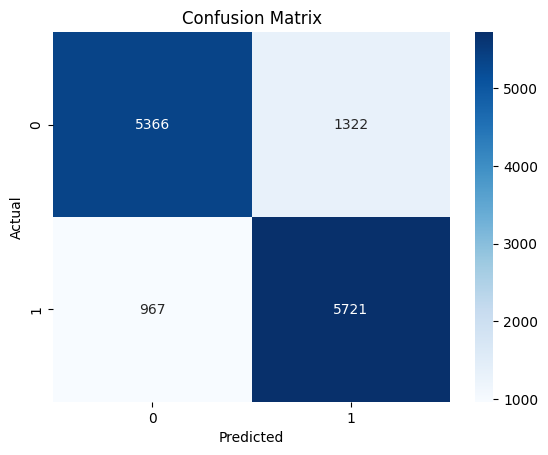

In [23]:
y_pred = tabnet.predict(X_test.values)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
predictions_aug = tabnet.predict(X_test.values)

In [25]:
# Membandingkan hasil prediksi
comparison = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predictions_aug
})
print(comparison.head())

       True Label  Predicted Label
65843           1                1
27123           1                1
20832           0                0
64521           1                0
44423           1                0


In [26]:
# Analisis perbedaan
comparison['Correct'] = comparison['True Label'] == comparison['Predicted Label']
print(comparison['Correct'].value_counts())

Correct
True     11087
False     2289
Name: count, dtype: int64


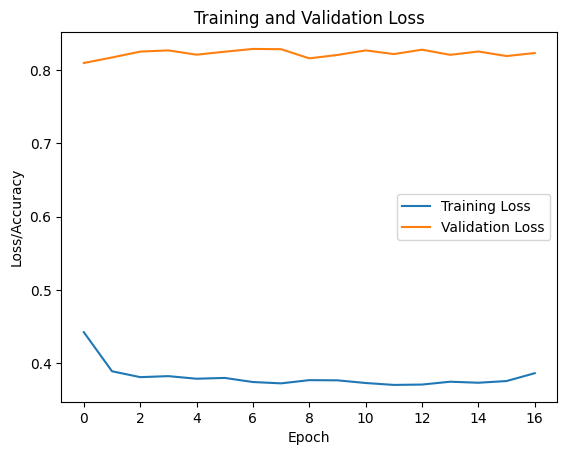

In [28]:
# Plot akurasi selama training
plt.plot(tabnet.history['loss'], label='Training Loss')
plt.plot(tabnet.history['valid_accuracy'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [27]:
# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, predictions_aug))

# Tampilkan metrik lainnya
accuracy = accuracy_score(y_test, predictions_aug)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      6688
           1       0.81      0.86      0.83      6688

    accuracy                           0.83     13376
   macro avg       0.83      0.83      0.83     13376
weighted avg       0.83      0.83      0.83     13376

Accuracy: 0.8288726076555024
